<h1 style="color: #2E86C1; text-align: center;">Notebook for Demographic Perspective: Zip Code e.g. Customer Region</h1>
<hr style="border: 1px solid #2E86C1;">
<p style="font-size: 16px;">This notebook provides a comprehensive analysis of customer regions based on ZIP codes. Follow the steps below to process and visualize the data:</p>
<ol style="font-size: 16px;">
    <li>Take <code>processed_ABCDEats_data.csv</code> and replace "-" with "0000".</li>
    <li>Cast datatype <code>Object</code> to <code>int</code> for the column <strong>Customer Region</strong>.</li>
    <li>Create <code>processedZip_ABCDEats_data.csv</code> with the updated data.</li>
    <li>Standardize ZIP code format to 5 digits.</li>
    <li>Create columns <code>area_type</code> (suburban, city, rural) and <code>region</code> (e.g., Plymouth County, MA).</li>
    <li>Create a bar chart for the distribution of <code>area_type</code>.</li>
</ol>

In [29]:
from os.path import join
import pandas as pd
import numpy as np

<h4>Process processed_ABCDEats_data.csv to processedZip_ABCDEats_data.csv</h4>

In [30]:
df = pd.read_csv(join('..', 'data', 'processed_ABCDEats_data.csv'))
df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,weekend_ratio,lunch_orders,dinner_orders,meal_preference,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders,primary_time_period
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,1.0,0,2,dinner,0,0,2,0,0,evening
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,1.0,1,0,lunch,1,1,0,0,0,morning
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,1.0,1,0,lunch,1,1,0,0,0,morning
3,180c632ed8,4660,24,2,3,1,0,2,DELIVERY,DIGI,...,0.5,1,0,lunch,0,2,0,0,0,midday
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,0.5,0,0,dinner,2,0,0,0,0,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,f4e366c281,8670,30,1,1,1,34,0,FREEBIE,DIGI,...,1.0,1,0,lunch,0,1,0,0,0,midday
31733,f6b6709018,8670,27,1,1,0,28,0,DELIVERY,DIGI,...,1.0,0,0,dinner,0,0,1,0,0,evening
31734,f74ad8ce3f,8670,24,1,1,1,12,0,-,DIGI,...,1.0,0,0,dinner,0,0,0,0,1,drinking
31735,f7b19c0241,8670,34,1,1,0,7,0,DISCOUNT,DIGI,...,1.0,1,0,lunch,0,1,0,0,0,midday


In [31]:
# Count non-numeric values
non_numeric_count = pd.to_numeric(df['customer_region'], errors='coerce').isna().sum()
print(f"\nFound {non_numeric_count} non-numeric values")


Found 442 non-numeric values


In [32]:
#Clean -   values and cast to int
df_clean = df.copy()
df_clean['customer_region'] = df['customer_region'].replace('-   ', '0000')
df_clean['customer_region'] = pd.to_numeric(df_clean['customer_region'], errors='coerce').fillna(0).astype(int).astype(str).str.zfill(4)

In [33]:
df_clean['customer_region'] = df_clean['customer_region'].astype(int)

In [34]:
# Count non-numeric values
non_numeric_count = pd.to_numeric(df_clean['customer_region'], errors='coerce').isna().sum()
print(f"\nFound {non_numeric_count} non-numeric values")


Found 0 non-numeric values


In [35]:
#df_clean.to_csv('../data/processedZip_ABCDEats_data.csv', index=False)

<h4>Steps 4.- 6.</h4>

In [36]:
df= df_clean

In [37]:
df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,weekend_ratio,lunch_orders,dinner_orders,meal_preference,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders,primary_time_period
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,1.0,0,2,dinner,0,0,2,0,0,evening
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,1.0,1,0,lunch,1,1,0,0,0,morning
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,1.0,1,0,lunch,1,1,0,0,0,morning
3,180c632ed8,4660,24,2,3,1,0,2,DELIVERY,DIGI,...,0.5,1,0,lunch,0,2,0,0,0,midday
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,0.5,0,0,dinner,2,0,0,0,0,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,f4e366c281,8670,30,1,1,1,34,0,FREEBIE,DIGI,...,1.0,1,0,lunch,0,1,0,0,0,midday
31733,f6b6709018,8670,27,1,1,0,28,0,DELIVERY,DIGI,...,1.0,0,0,dinner,0,0,1,0,0,evening
31734,f74ad8ce3f,8670,24,1,1,1,12,0,-,DIGI,...,1.0,0,0,dinner,0,0,0,0,1,drinking
31735,f7b19c0241,8670,34,1,1,0,7,0,DISCOUNT,DIGI,...,1.0,1,0,lunch,0,1,0,0,0,midday


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

def standardize_zip(customer_region):
    """
    Standardize ZIP code format to 5 digits
    
    Args:
        customer_region: The ZIP code to standardize
    Returns:
        str: Standardized 5-digit ZIP code
    """
    try:
        if pd.isna(customer_region):
            return None
        # Convert to string and pad with leading zeros if needed
        return str(int(customer_region)).zfill(5)
    except (ValueError, TypeError):
        return None

def classify_area(customer_region):
    """
    Classify area based on specific ZIP code patterns in the dataset
    
    Args:
        customer_region: ZIP code to classify
    Returns:
        tuple: (area_type, region)
    """
    if pd.isna(customer_region):
        return ('undefined', 'undefined')
        
    zip_str = standardize_zip(customer_region)
    if not zip_str:
        return ('undefined', 'undefined')
    
    # Classification based on the specific ZIP codes in dataset
    
    # New England Region (02xxx)
    if zip_str.startswith('02'):
        # Plymouth area
        if zip_str in ['02360']:
            return ('city', 'Plymouth County, MA')
        # Cape Cod area
        elif zip_str in ['02440', '02490']:
            return ('coastal', 'Cape Cod, MA')
        return ('suburban', 'Massachusetts')
        
    # Maine Region (04xxx)
    elif zip_str.startswith('04'):
        if zip_str in ['04660']:
            return ('coastal', 'Coastal Maine')
        return ('rural', 'Maine')
        
    # New Jersey/NY Metro Region (08xxx)
    elif zip_str.startswith('08'):
        if zip_str in ['08670']:
            return ('suburban', 'New Jersey')
        return ('suburban', 'New Jersey Metro')
        
    # Default case
    return ('undefined', 'Other')

def process_customer_data(df):
    """
    Process customer data to add area classifications
    
    Args:
        df (pandas.DataFrame): Input dataframe with customer_region column
    Returns:
        pandas.DataFrame: DataFrame with added classification columns
    """
    # Create a copy to avoid modifying the original
    result_df = df.copy()
    
    # Add classifications
    print("Classifying ZIP codes...")
    classifications = result_df['customer_region'].apply(classify_area)
    result_df['area_type'] = classifications.apply(lambda x: x[0])
    result_df['region'] = classifications.apply(lambda x: x[1])
    
    # Generate analysis
    print("\nArea Type Distribution:")
    print(result_df['area_type'].value_counts())
    
    print("\nRegional Distribution:")
    print(result_df['region'].value_counts())
    
    # Calculate average spending by area type
    print("\nAverage Spending by Area Type:")
    avg_spending = result_df.groupby('area_type')['total_spending'].mean()
    print(avg_spending)
    
    # Calculate average spending by region
    print("\nAverage Spending by Region:")
    avg_region_spending = result_df.groupby('region')['total_spending'].mean()
    print(avg_region_spending)
    
    return result_df


# Process the dataframe
df = process_customer_data(df)
df.to_csv('../data/processedZip_ABCDEats_data.csv', index=False)

Classifying ZIP codes...

Area Type Distribution:
area_type
coastal      11478
suburban     10131
city          8829
rural          857
undefined      442
Name: count, dtype: int64

Regional Distribution:
region
New Jersey             9623
Coastal Maine          9550
Plymouth County, MA    8829
Cape Cod, MA           1928
Maine                   857
New Jersey Metro        508
Other                   442
Name: count, dtype: int64

Average Spending by Area Type:
area_type
city         22.377279
coastal      36.652117
rural        28.661610
suburban     51.336196
undefined    49.377828
Name: total_spending, dtype: float64

Average Spending by Region:
region
Cape Cod, MA           19.973029
Coastal Maine          40.019372
Maine                  28.661610
New Jersey             51.785514
New Jersey Metro       42.824803
Other                  49.377828
Plymouth County, MA    22.377279
Name: total_spending, dtype: float64


In [61]:
# Process the dataframe
df_with_areas = process_customer_data(df)

Classifying ZIP codes...

Area Type Distribution:
area_type
coastal      11478
suburban     10131
city          8829
rural          857
undefined      442
Name: count, dtype: int64

Regional Distribution:
region
New Jersey             9623
Coastal Maine          9550
Plymouth County, MA    8829
Cape Cod, MA           1928
Maine                   857
New Jersey Metro        508
Other                   442
Name: count, dtype: int64

Average Spending by Area Type:
area_type
city         22.377279
coastal      36.652117
rural        28.661610
suburban     51.336196
undefined    49.377828
Name: total_spending, dtype: float64

Average Spending by Region:
region
Cape Cod, MA           19.973029
Coastal Maine          40.019372
Maine                  28.661610
New Jersey             51.785514
New Jersey Metro       42.824803
Other                  49.377828
Plymouth County, MA    22.377279
Name: total_spending, dtype: float64


In [78]:
df = pd.read_csv('../data/processedZip_ABCDEats_data.csv')
df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,dinner_orders,meal_preference,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders,primary_time_period,area_type,region
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,2,dinner,0,0,2,0,0,evening,city,"Plymouth County, MA"
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,0,lunch,1,1,0,0,0,morning,suburban,New Jersey
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,0,lunch,1,1,0,0,0,morning,coastal,Coastal Maine
3,180c632ed8,4660,24,2,3,1,0,2,DELIVERY,DIGI,...,0,lunch,0,2,0,0,0,midday,coastal,Coastal Maine
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,0,dinner,2,0,0,0,0,morning,coastal,Coastal Maine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,f4e366c281,8670,30,1,1,1,34,0,FREEBIE,DIGI,...,0,lunch,0,1,0,0,0,midday,suburban,New Jersey
31733,f6b6709018,8670,27,1,1,0,28,0,DELIVERY,DIGI,...,0,dinner,0,0,1,0,0,evening,suburban,New Jersey
31734,f74ad8ce3f,8670,24,1,1,1,12,0,-,DIGI,...,0,dinner,0,0,0,0,1,drinking,suburban,New Jersey
31735,f7b19c0241,8670,34,1,1,0,7,0,DISCOUNT,DIGI,...,0,lunch,0,1,0,0,0,midday,suburban,New Jersey


In [65]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the scaled dataframe
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,dinner_orders,meal_preference,morning_orders,midday_orders,evening_orders,night_orders,drinking_orders,primary_time_period,area_type,region
0,1b8f824d5e,-1.029273,-1.338044,-0.402940,-0.099538,-0.459198,-1.181245,-2.707106,DELIVERY,DIGI,...,0.757104,dinner,-0.463208,-0.615700,0.204674,-0.276604,-0.362107,evening,city,"Plymouth County, MA"
1,5d272b9dcb,1.356396,-1.478899,-0.402940,-0.530395,-0.208168,-1.181245,-2.707106,DISCOUNT,DIGI,...,-0.434062,lunch,0.084697,-0.184514,-0.582069,-0.276604,-0.362107,morning,suburban,New Jersey
2,f6d1b2ba63,-0.159695,1.479045,-0.763931,-0.530395,-0.208168,-1.181245,-2.707106,DISCOUNT,CASH,...,-0.434062,lunch,0.084697,-0.184514,-0.582069,-0.276604,-0.362107,morning,coastal,Coastal Maine
3,180c632ed8,-0.159695,-0.492917,-0.402940,-0.386776,-0.459198,-1.181245,-2.663969,DELIVERY,DIGI,...,-0.434062,lunch,-0.463208,0.246671,-0.582069,-0.276604,-0.362107,midday,coastal,Coastal Maine
4,4eb37a6705,-0.159695,-1.056335,-0.402940,-0.099538,-0.710229,-1.181245,-2.663969,-,DIGI,...,-0.434062,dinner,0.632602,-0.615700,-0.582069,-0.276604,-0.362107,morning,coastal,Coastal Maine


In [66]:
area_type_counts = df['area_type'].value_counts()
print(area_type_counts)

area_type
coastal      11478
suburban     10131
city          8829
rural          857
undefined      442
Name: count, dtype: int64


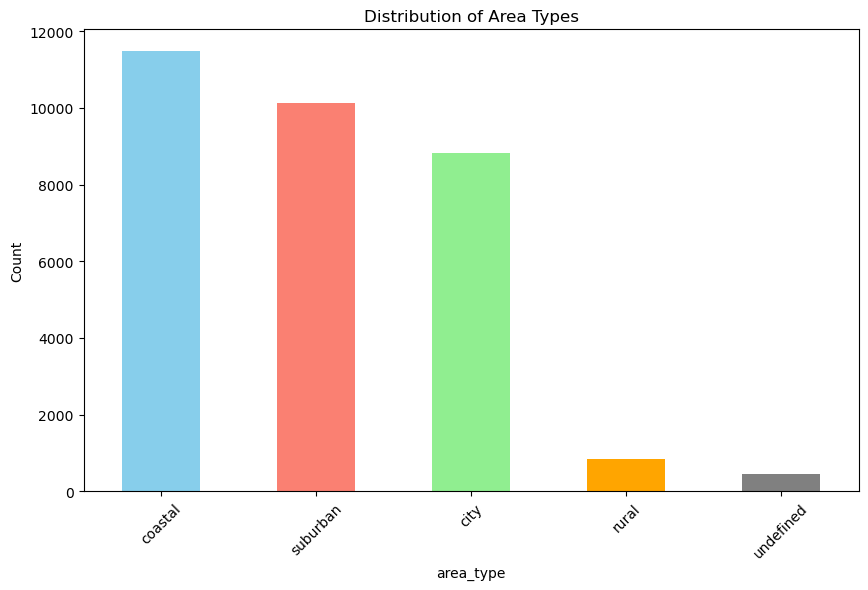

In [67]:
import matplotlib.pyplot as plt

# Plot the distribution of area types
plt.figure(figsize=(10, 6))
area_type_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Area Types')
plt.xlabel('Area Type')
plt.ylabel('Count')
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'grey']
area_type_counts.plot(kind='bar', color=colors)
plt.xticks(rotation=45)
plt.show()

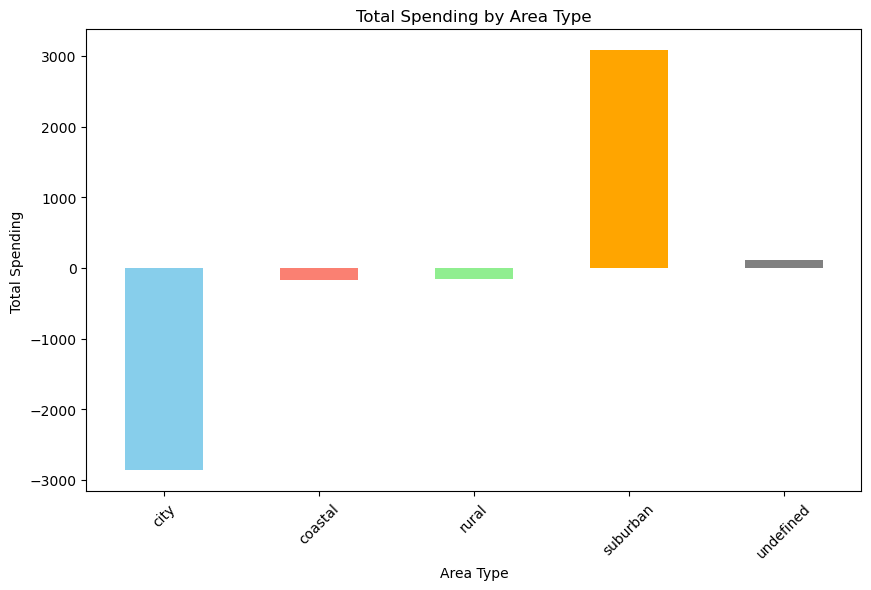

,area_type,total_spending
0,city,-2863.293406
1,coastal,-168.715353
2,rural,-161.120170
3,suburban,3077.630565
4,undefined,115.498364


In [72]:
# Calculate total spending by area type
total_spending_by_area = df.groupby('area_type')['total_spending'].sum()

# Plot the total spending by area type
plt.figure(figsize=(10, 6))
total_spending_by_area.plot(kind='bar', color=colors)
plt.title('Total Spending by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()
# Create a table for total spending by area type
total_spending_by_area_table = total_spending_by_area.reset_index()
total_spending_by_area_table.columns = ['area_type', 'total_spending']
total_spending_by_area_table

,area_type,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
0,city,-2195.265970,-3015.673971,-136.736735,-738.763877,2921.472460,1263.560432,-821.653364,-736.895349,330.642875,-1943.033217,-1095.120902,2662.510622,842.019312,-2017.399942,-184.278633
1,coastal,1544.471900,-2433.498256,-2598.226124,2091.910091,-656.473714,-800.864833,-1735.615116,538.795195,1893.648401,4125.296284,678.473708,-926.829274,2254.026324,-2523.938843,2132.912432
2,rural,-37.070492,-308.906408,-227.223531,-55.098070,-132.836754,-123.632103,-141.404870,-91.587236,50.826974,799.810121,-143.595670,-130.138138,-25.026154,-118.278554,12.798009
3,suburban,649.079938,5541.489095,2830.746643,-1243.783765,-2043.027821,-308.996683,2587.167143,294.653241,-2180.007849,-2857.408821,536.758317,-1538.424123,-2939.569115,4476.382125,-1879.434943
4,undefined,38.784624,216.589540,131.439748,-54.264379,-89.134172,-30.066814,111.506206,-4.965851,-95.110401,-124.664367,23.484546,-67.119086,-131.450368,183.235214,-81.996866


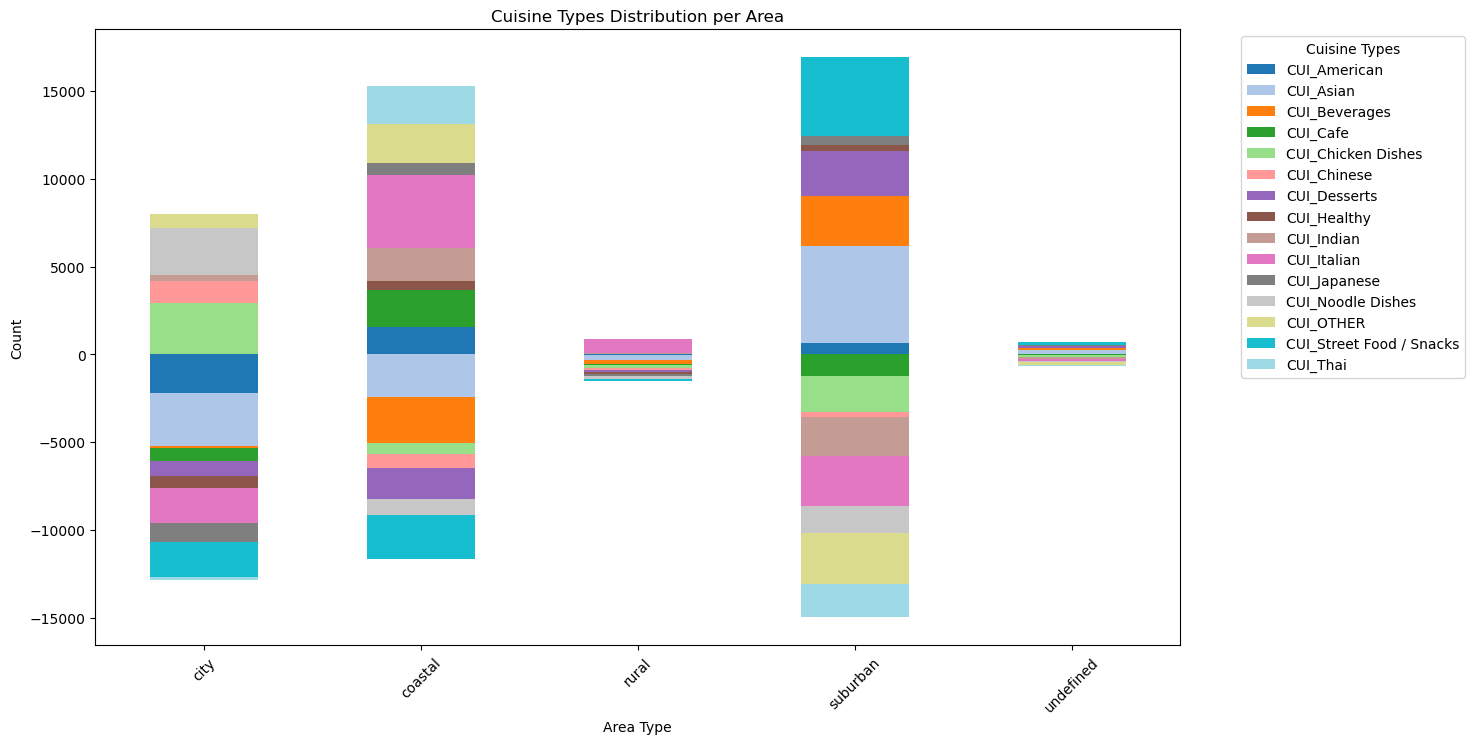

In [75]:
# Calculate the sum of each cuisine type per area
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
cuisine_per_area = df.groupby('area_type')[cuisine_columns].sum()

# Plot the cuisine types per area
cuisine_per_area.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Cuisine Types Distribution per Area')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Types', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.xticks(rotation=45)
plt.legend(title='Cuisine Types', bbox_to_anchor=(1.05, 1), loc='upper left')
# Create a table for cuisine types per area
cuisine_per_area_table = cuisine_per_area.reset_index()
cuisine_per_area_table.columns = ['area_type'] + cuisine_columns
cuisine_per_area_table

In [76]:
# Calculate the sum of orders for each day of the week per area
days_of_week = [f'DOW_{i}' for i in range(7)]
orders_per_day_per_area = df.groupby('area_type')[days_of_week].sum()

# Plot the orders per day per area
# orders_per_day_per_area.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
# plt.title('Orders per Day of the Week per Area')
# plt.xlabel('Area Type')
# plt.ylabel('Number of Orders')
# plt.xticks(rotation=45)
# plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()
# Create a table for orders per day of the week per area
orders_per_day_per_area_table = orders_per_day_per_area.reset_index()
orders_per_day_per_area_table

,area_type,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
0,city,895.849741,942.098139,980.462737,867.946810,815.897572,945.611660,1108.243996
1,coastal,-25.230917,65.225592,129.626452,527.269165,1061.397090,485.206822,438.468784
2,rural,-177.801811,-175.482929,-145.720816,-158.833553,-66.492720,-140.040813,-92.630849
3,suburban,-664.460978,-780.249405,-902.952877,-1185.069831,-1722.778616,-1230.229238,-1385.912917
4,undefined,-28.356036,-51.591397,-61.415496,-51.312591,-88.023326,-60.548431,-68.169015


In [71]:
df['region']


0        Plymouth County, MA
1                 New Jersey
2              Coastal Maine
3              Coastal Maine
4              Coastal Maine
                ...         
31732             New Jersey
31733             New Jersey
31734             New Jersey
31735             New Jersey
31736          Coastal Maine
Name: region, Length: 31737, dtype: object